# 실습 과제
### 과제 1: 회귀 분석
목표: 특정 변수에 대한 선형 회귀 모델을 구축하고 평가합니다.

데이터셋: California Housing dataset을 사용합니다.

내용:
1. 데이터를 불러오고, 독립 변수(X)와 종속 변수(y)를 설정합니다.
2. 훈련 데이터와 테스트 데이터로 분할합니다.
3. 선형 회귀 모델을 학습시키고, 테스트 데이터에 대해 예측합니다.
4. 예측 결과를 평가하고, MSE와 R^2 점수를 계산합니다.
5. 실제 값과 예측 값을 시각화합니다.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
# 1. 데이터를 불러오고, 독립 변수(X)와 종속 변수(y)를 설정합니다.
california = fetch_california_housing()
X, y = california.data, california.target

# 2. 훈련 데이터와 테스트 데이터로 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 선형 회귀 모델을 학습시키고, 테스트 데이터에 대해 예측합니다.
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 4. 예측 결과를 평가하고, MSE와 R^2 점수를 계산합니다.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error (MSE): 0.555891598695242
R^2 Score: 0.5757877060324526


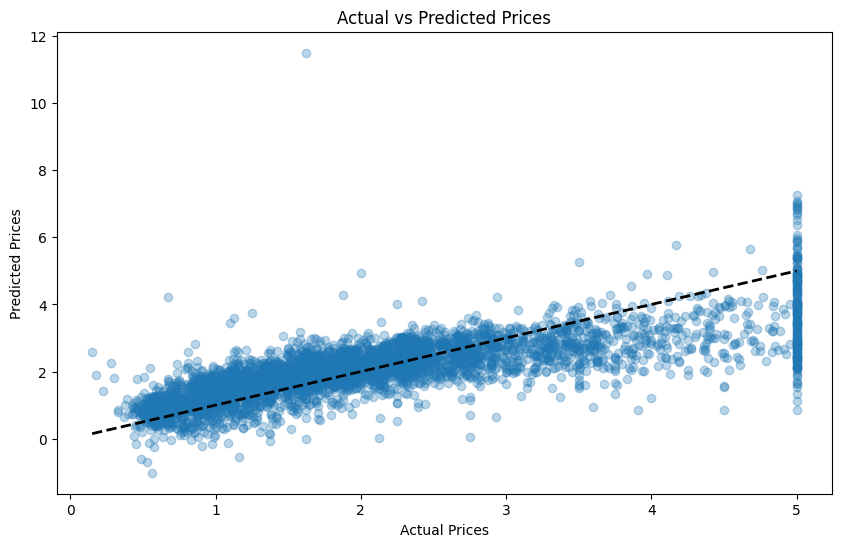

In [26]:
# 5. 실제 값과 예측 값을 시각화합니다.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

### 과제 2: 분류 분석
목표: 특정 데이터에 대한 나이브 베이즈 분류 모델을 구축하고 평가합니다.

데이터셋: Wine dataset을 사용합니다.

내용:
1. 데이터를 불러오고, 독립 변수(X)와 종속 변수(y)를 설정합니다.
2. 훈련 데이터와 테스트 데이터로 분할합니다.
3. 나이브 베이즈 모델을 학습시키고, 테스트 데이터에 대해 예측합니다.
4. 예측 결과를 평가하고, 정확도와 혼동 행렬을 계산합니다.
5. 혼동 행렬을 시각화합니다.


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [21]:
# 1. 데이터를 불러오고, 독립 변수(X)와 종속 변수(y)를 설정합니다.
wine = load_wine()
X, y = wine.data, wine.target

# 2. 훈련 데이터와 테스트 데이터로 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 나이브 베이즈 모델을 학습시키고, 테스트 데이터에 대해 예측합니다.
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 4. 예측 결과를 평가하고, 정확도와 혼동 행렬을 계산합니다.
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')


Accuracy: 1.0
Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


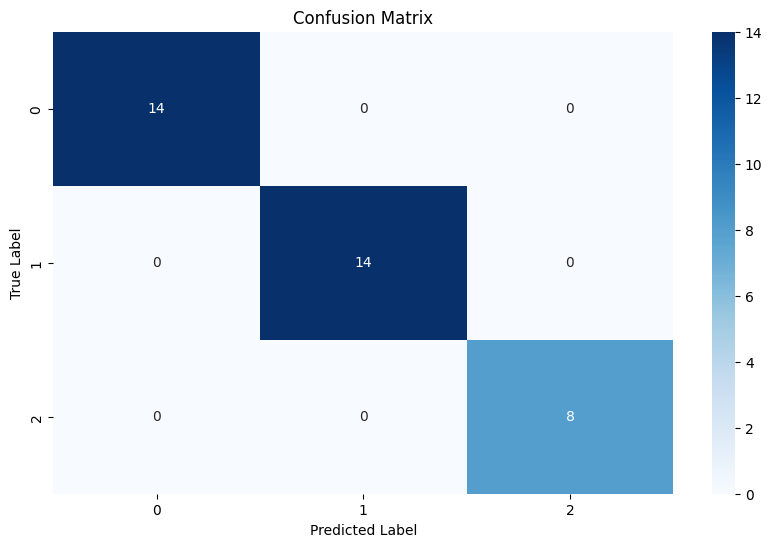

In [22]:
# 5. 혼동 행렬을 시각화합니다.
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

###과제 3: 교차 검증

목표: 데이터에 대해 교차 검증을 수행하여 모델 성능을 평가합니다.

데이터셋: Diabetes dataset을 사용합니다.

내용:
1. 데이터를 불러오고, 독립 변수(X)와 종속 변수(y)를 설정합니다.
2. 나이브 베이즈 모델을 사용하여 5-겹 교차 검증을 수행합니다.
3. 교차 검증 점수를 출력하고 평균 점수를 계산합니다.
4. 교차 검증 결과를 시각화합니다.


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


In [19]:
# 1. 데이터를 불러오고, 독립 변수(X)와 종속 변수(y)를 설정합니다.
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# 종속 변수(y)를 이진 분류로 변경 (예: 중간 값을 기준으로 구분)
y_binary = np.where(y > np.median(y), 1, 0)

# 2. 나이브 베이즈 모델을 사용하여 5-겹 교차 검증을 수행합니다.
model = GaussianNB()
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y_binary, cv=kf, scoring='accuracy')

# 3. 교차 검증 점수를 출력하고 평균 점수를 계산합니다.
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')


Cross-validation scores: [0.71910112 0.79775281 0.64772727 0.73863636 0.71590909]
Mean cross-validation score: 0.7238253319713993


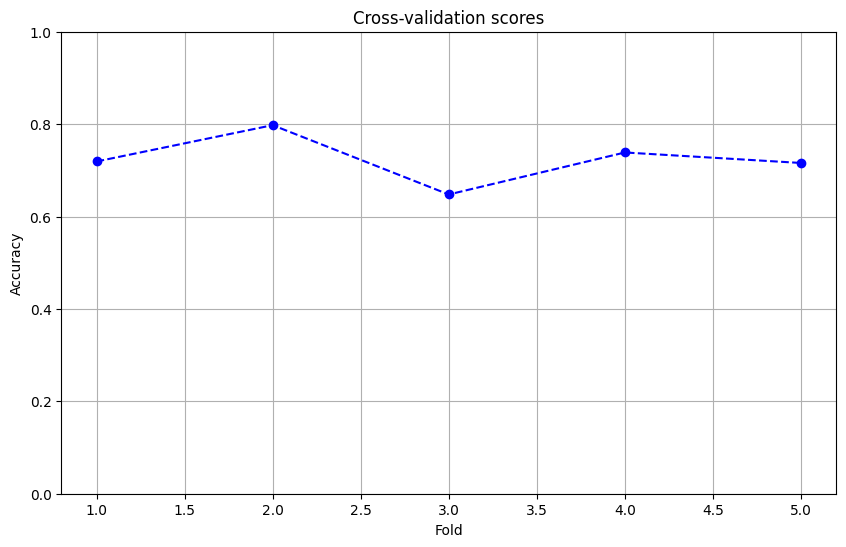

In [20]:
# 4. 교차 검증 결과를 시각화합니다.
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='--', color='b')
plt.title('Cross-validation scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid()
plt.show()